# Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

In [17]:
#Import Dependencies
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sb

from datetime import datetime, date, timedelta

#Import SQL Alchemy
import sqlalchemy
from sqlalchemy import create_engine, inspect

#Import Base to create classes and other sql dependencies
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import extract, func, desc
from sqlalchemy.engine import reflection

Base = declarative_base()

#Import dependencies to create columns and its datatypes
from sqlalchemy import Column, Integer, String, Float, Date

import pymysql
pymysql.install_as_MySQLdb()



In [18]:
#Connect to existing clean_hawaii sqlite database
engine = create_engine("sqlite:///hawaii_clean.sqlite")

In [19]:
#Create base
Base = automap_base()

In [20]:
#Reflect database tables
Base.prepare(engine, reflect=True)

In [21]:
#Show classes
Base.classes.keys()

['measurements', 'stations']

In [40]:
#Assign classes to variables
measurement = Base.classes.measurements
Base.classes.measurements

sqlalchemy.ext.automap.measurements

In [41]:
station = Base.classes.stations
Base.classes.stations

sqlalchemy.ext.automap.stations

In [42]:
#Create session
session = Session(bind=engine)

In [43]:
#Pull data from sql database. I'm pulling 6 months of data
mydata=session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2017-02-23','2017-08-23')).all()

In [44]:
len(mydata)

969

In [45]:
engine =  engine.connect()
engine

In [46]:
#Convert precipitation data to dataframe
prcp_df = pd.DataFrame.from_records(mydata)
prcp_df.head()

,0,1
0,2017-02-23,0.01
1,2017-02-24,0.00
2,2017-02-25,0.03
3,2017-02-26,0.00
4,2017-02-27,0.00


In [47]:
#Rename columns to date and precipication
precipitation_df = prcp_df.rename(columns={0: "Date", 1: "Precipitation"})
precipitation_df.head()

,Date,Precipitation
0,2017-02-23,0.01
1,2017-02-24,0.00
2,2017-02-25,0.03
3,2017-02-26,0.00
4,2017-02-27,0.00


In [48]:
#Set data index to use in graph plot
precipitation_df.set_index(["Date"], inplace = True)
precipitation_df.head()

,Precipitation
Date,
2017-02-23,0.01
2017-02-24,0.00
2017-02-25,0.03
2017-02-26,0.00
2017-02-27,0.00


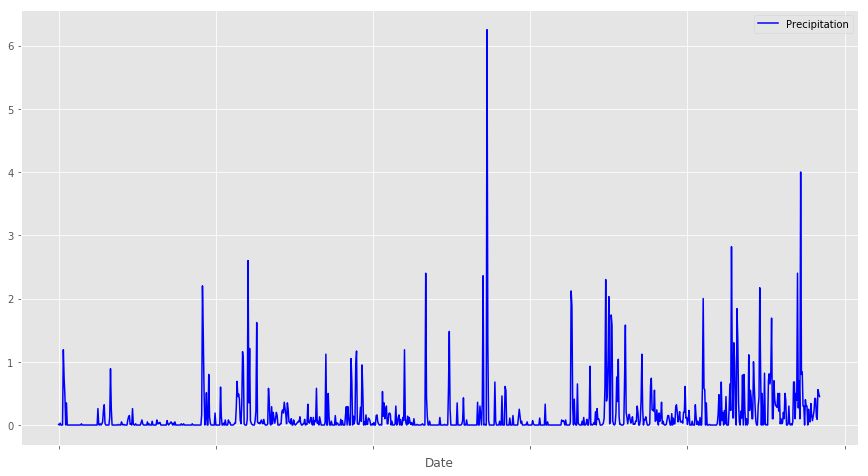

In [49]:
plt.style.use('ggplot')
fig = plt.figure()

#Create plot
precipitation_df.plot(figsize = (15,8), color='blue', rot = 600)

plt.savefig("Hawaii_Precipitation_analysis_over_6_months.png")
plt.show()

# Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  <center><img src='images/temp_hist.png' height="400px" /></center>


In [50]:
tot_stations = session.query(station.station).filter(station.station == 'USC00519397').count()
tot_stations

1

In [52]:
tol_num_stations = session.query(measurement).group_by(measurement.station).count()
tol_num_stations

9

In [36]:
totl_num_of_stations = session.query(hawaii_measurement).group_by(hawaii_measurement.station).count()
totl_num_of_stations

9

In [53]:
#Find most active stations
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [55]:
#List the stations and observation counts in descending order 
Active_stations = session.query(measurement.station, station.name, measurement.date, func.count(measurement.tobs)).\
                          join(station, station.station == measurement.station).\
                          group_by(measurement.station).\
                          order_by(func.count(measurement.tobs).desc()).all()


Active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', '2017-08-18', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', '2017-07-31', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2017-08-23', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', '2017-08-23', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', '2017-08-23', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', '2017-08-23', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', '2015-10-30', 1932),
 ('USC00517948', 'PEARL CITY, HI US', '2017-07-28', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', '2015-10-20', 342)]

In [56]:
#Most active station
Active_stations[0][0:2]

('USC00519281', 'WAIHEE 837.5, HI US')

In [63]:
station_tobs = session.query(measurement.station, station.station.name, measurement.date, measurement.tobs).\
               filter(measurement.station == (Active_stations[0][0])).\
               filter(measurement.date.between('2016-08-23', '2017-08-23')).all()
            
        
len(station_tobs)

352

In [64]:
#convert to dataframe and rename
tobs_df = pd.DataFrame.from_records(station_tobs)
tobs_df.head()

,0,1,2,3
0,USC00519281,USC00519281,2016-08-23,77
1,USC00519281,USC00519281,2016-08-24,77
2,USC00519281,USC00519281,2016-08-25,80
3,USC00519281,USC00519281,2016-08-26,80
4,USC00519281,USC00519281,2016-08-27,75


In [65]:
station_analysis_df = tobs_df.rename(columns={0: "station", 1: "name", 2: "date", 3: "tobs"})
station_analysis_df.head()

,station,name,date,tobs
0,USC00519281,USC00519281,2016-08-23,77
1,USC00519281,USC00519281,2016-08-24,77
2,USC00519281,USC00519281,2016-08-25,80
3,USC00519281,USC00519281,2016-08-26,80
4,USC00519281,USC00519281,2016-08-27,75


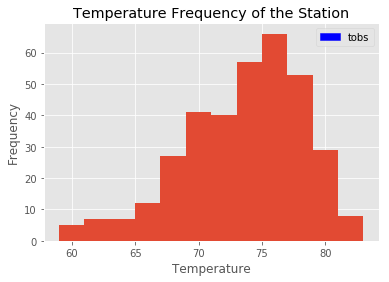

In [68]:
#Plot the results as a histogram with bins=12 for 12 months
plt.style.use('ggplot')
fig = plt.figure() 
plt.figsize = (20,10)

x = station_analysis_df['tobs'] 

# the histogram of the data
plt.hist(x, bins=12)


#create legend
red_patch = mpatches.Patch(color='blue', label='tobs')
plt.legend(handles=[red_patch])

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Frequency of the Station')
plt.grid(True)

plt.savefig("Temperature station analysis.png")
plt.show()

 

# Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='images/temp_avg.png' height="400px"/></center>

In [73]:
def calc_temps(start_date, end_date):
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()
print(calc_temps('2016-06-01','2016-12-31'))

[(60, 75.84387838948233, 84)]


In [74]:
temp = (calc_temps('2016-06-01','2016-12-31'))
labels = ['TMIN', 'TAVE','TMAX']
temp_df = pd.DataFrame.from_records(temp, columns=labels)

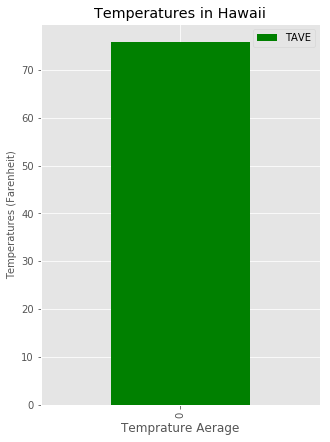

In [77]:
temp_bar_chart = temp_df[['TAVE']].plot(kind='bar', title ="Temperatures in Hawaii", figsize=(5, 7), legend=True, fontsize=10, grid=True, color='green')
temp_bar_chart.set_xlabel("Temprature Aerage", fontsize=12)
temp_bar_chart.set_ylabel("Temperatures (Farenheit)", fontsize=10)
plt.savefig("Average temp in Hawaii.png")
plt.show()